#This notebook shows the process of creating machine learning predictive models (some routine steps to build ML models)

Background: One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".
Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.
Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.
The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy).
https://www.kaggle.com/competitions/DontGetKicked/overview/description


Import a few tools for this project

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pickle # saving models


In [6]:
!python --version

Python 3.7.13


In [ ]:
# The following could be skipped if the training.csv and Carvana_Data_Dictionary.txt are in the same folder with this notebook file
from google.colab import files
files.upload()

# Load data

In [9]:
dgk_df = pd.read_csv('training.csv',parse_dates=["PurchDate"])
dgk_df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [10]:
test_df = pd.read_csv('test.csv',parse_dates=["PurchDate"])
test_df.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,2009-12-02,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,2009-12-02,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,2009-12-02,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,2009-12-02,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,2009-12-02,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


# Initial Check

In [11]:
dgk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              72983 non-null  int64         
 1   IsBadBuy                           72983 non-null  int64         
 2   PurchDate                          72983 non-null  datetime64[ns]
 3   Auction                            72983 non-null  object        
 4   VehYear                            72983 non-null  int64         
 5   VehicleAge                         72983 non-null  int64         
 6   Make                               72983 non-null  object        
 7   Model                              72983 non-null  object        
 8   Trim                               70623 non-null  object        
 9   SubModel                           72975 non-null  object        
 10  Color                             

From the DataFrame info, there are three types of features: date (datetime64[ns]), numerical(int64 ad float64) and categorical one with type: object

In [12]:
print("Description about the columns:\n")
des = open('Carvana_Data_Dictionary.txt', 'r')
print(des.read())

Description about the columns:

Field Name				Definition
RefID				        Unique (sequential) number assigned to vehicles
IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
PurchDate				The Date the vehicle was Purchased at Auction
Auction					Auction provider at which the  vehicle was purchased
VehYear					The manufacturer's year of the vehicle
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers
MMRAcquisit

#Exploratory Data Analysis

get these numeric features and drop RefID and BYTNO (won't affect modeling). 

In [14]:
num_features = dgk_df.select_dtypes(include =['float64', 'int64']).columns.drop(['RefId','BYRNO']) #inplace is not set yet for drop
print(num_features)

Index(['IsBadBuy', 'VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VNZIP1',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')


In [15]:
# categorical features
cat_features = dgk_df.select_dtypes(include =['object', 'datetime64[ns]']).columns
print(cat_features)

Index(['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color',
       'Transmission', 'WheelType', 'Nationality', 'Size',
       'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST'],
      dtype='object')


In [16]:
dates = dgk_df['PurchDate']
print(dates.dtype)
print(min(dates), max(dates), len(set(dates)))

datetime64[ns]
2009-01-05 00:00:00 2010-12-30 00:00:00 517


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc880de3910>,
      dtype=object)

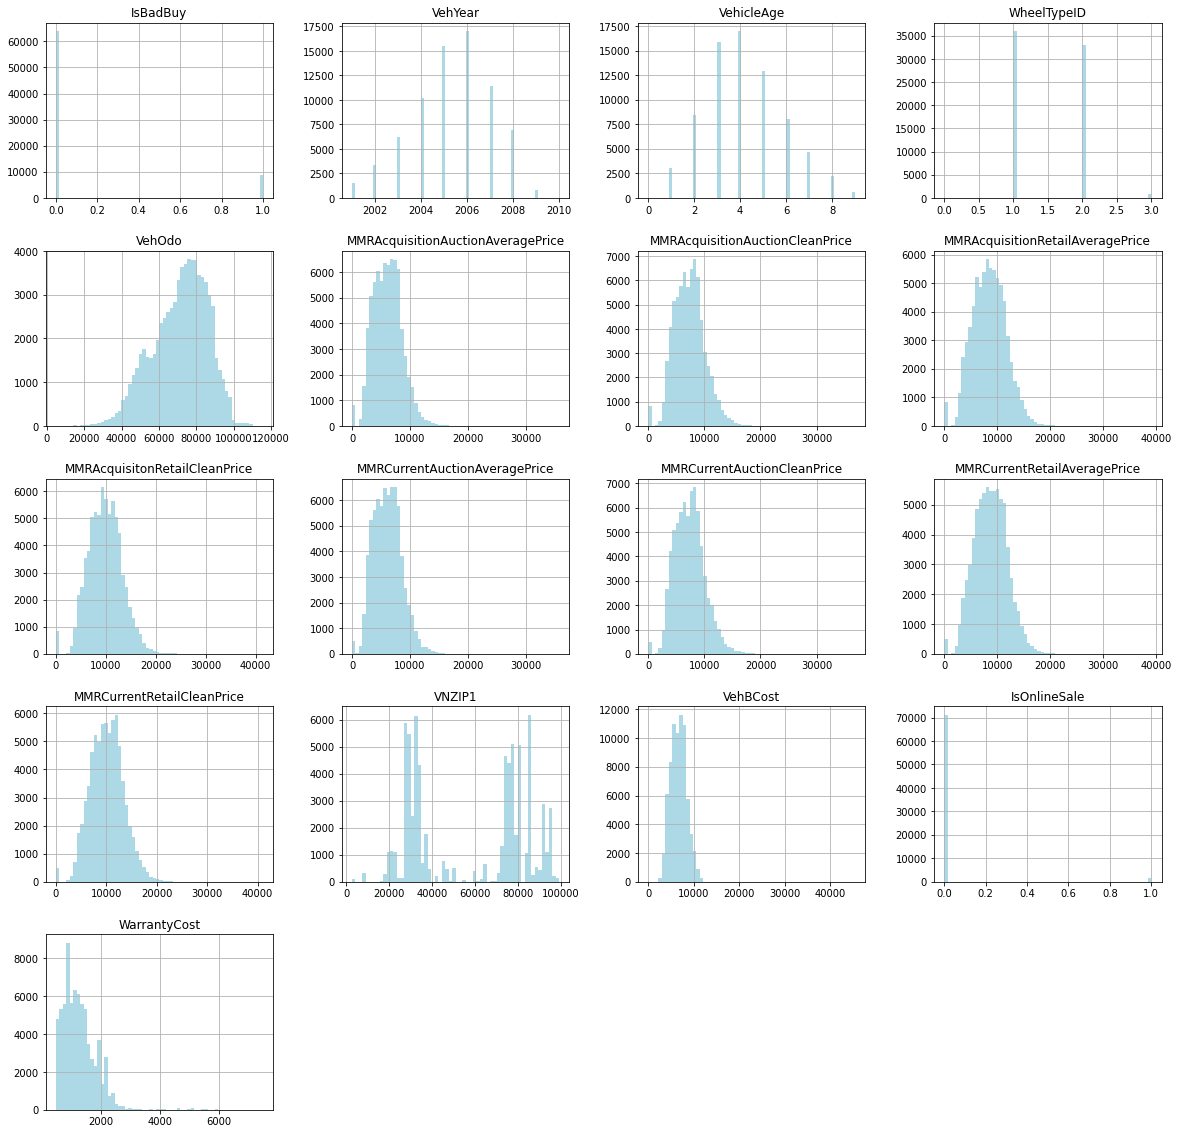

In [17]:
dgk_df[num_features].hist(figsize =(20,20),color='lightblue', bins =60)

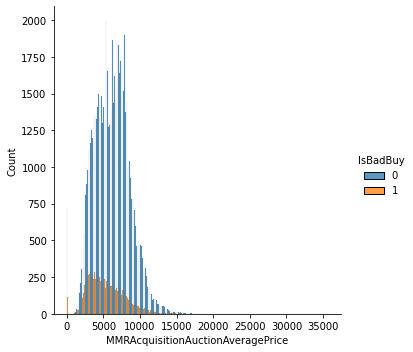

In [18]:
sns.displot(dgk_df, x="MMRAcquisitionAuctionAveragePrice", hue="IsBadBuy", multiple="dodge")

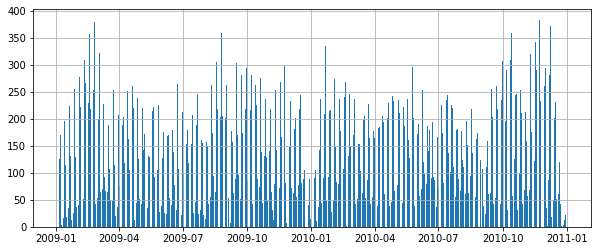

In [19]:
dgk_df['PurchDate'].hist(figsize =(10,4),bins =730)

#About purchase date
It looks making more sense to consider day of week

In [20]:
import datetime as dt
def get_day(df):
    df['date1'] = pd.to_datetime(df['PurchDate'])
    df['dow']=df['date1'].dt.day_name()  # 
    return (df)
dgk_df = get_day(dgk_df)
del dgk_df['date1']
print(dgk_df) # see the last column


       RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
0          1         0 2009-12-07   ADESA     2006           3      MAZDA   
1          2         0 2009-12-07   ADESA     2004           5      DODGE   
2          3         0 2009-12-07   ADESA     2005           4      DODGE   
3          4         0 2009-12-07   ADESA     2004           5      DODGE   
4          5         0 2009-12-07   ADESA     2005           4       FORD   
...      ...       ...        ...     ...      ...         ...        ...   
72978  73010         1 2009-12-02   ADESA     2001           8    MERCURY   
72979  73011         0 2009-12-02   ADESA     2007           2  CHEVROLET   
72980  73012         0 2009-12-02   ADESA     2005           4       JEEP   
72981  73013         0 2009-12-02   ADESA     2006           3  CHEVROLET   
72982  73014         0 2009-12-02   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel  ...  \
0              

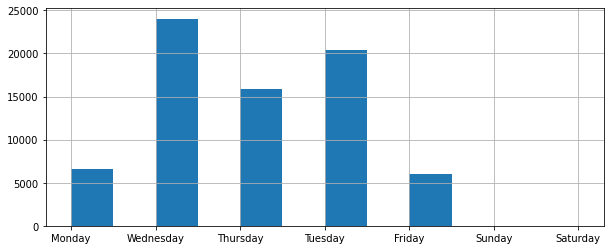

In [21]:
dgk_df['dow'].hist(figsize =(10,4),bins =12)

Distributions of all price related columns look similar, they might be correlated.

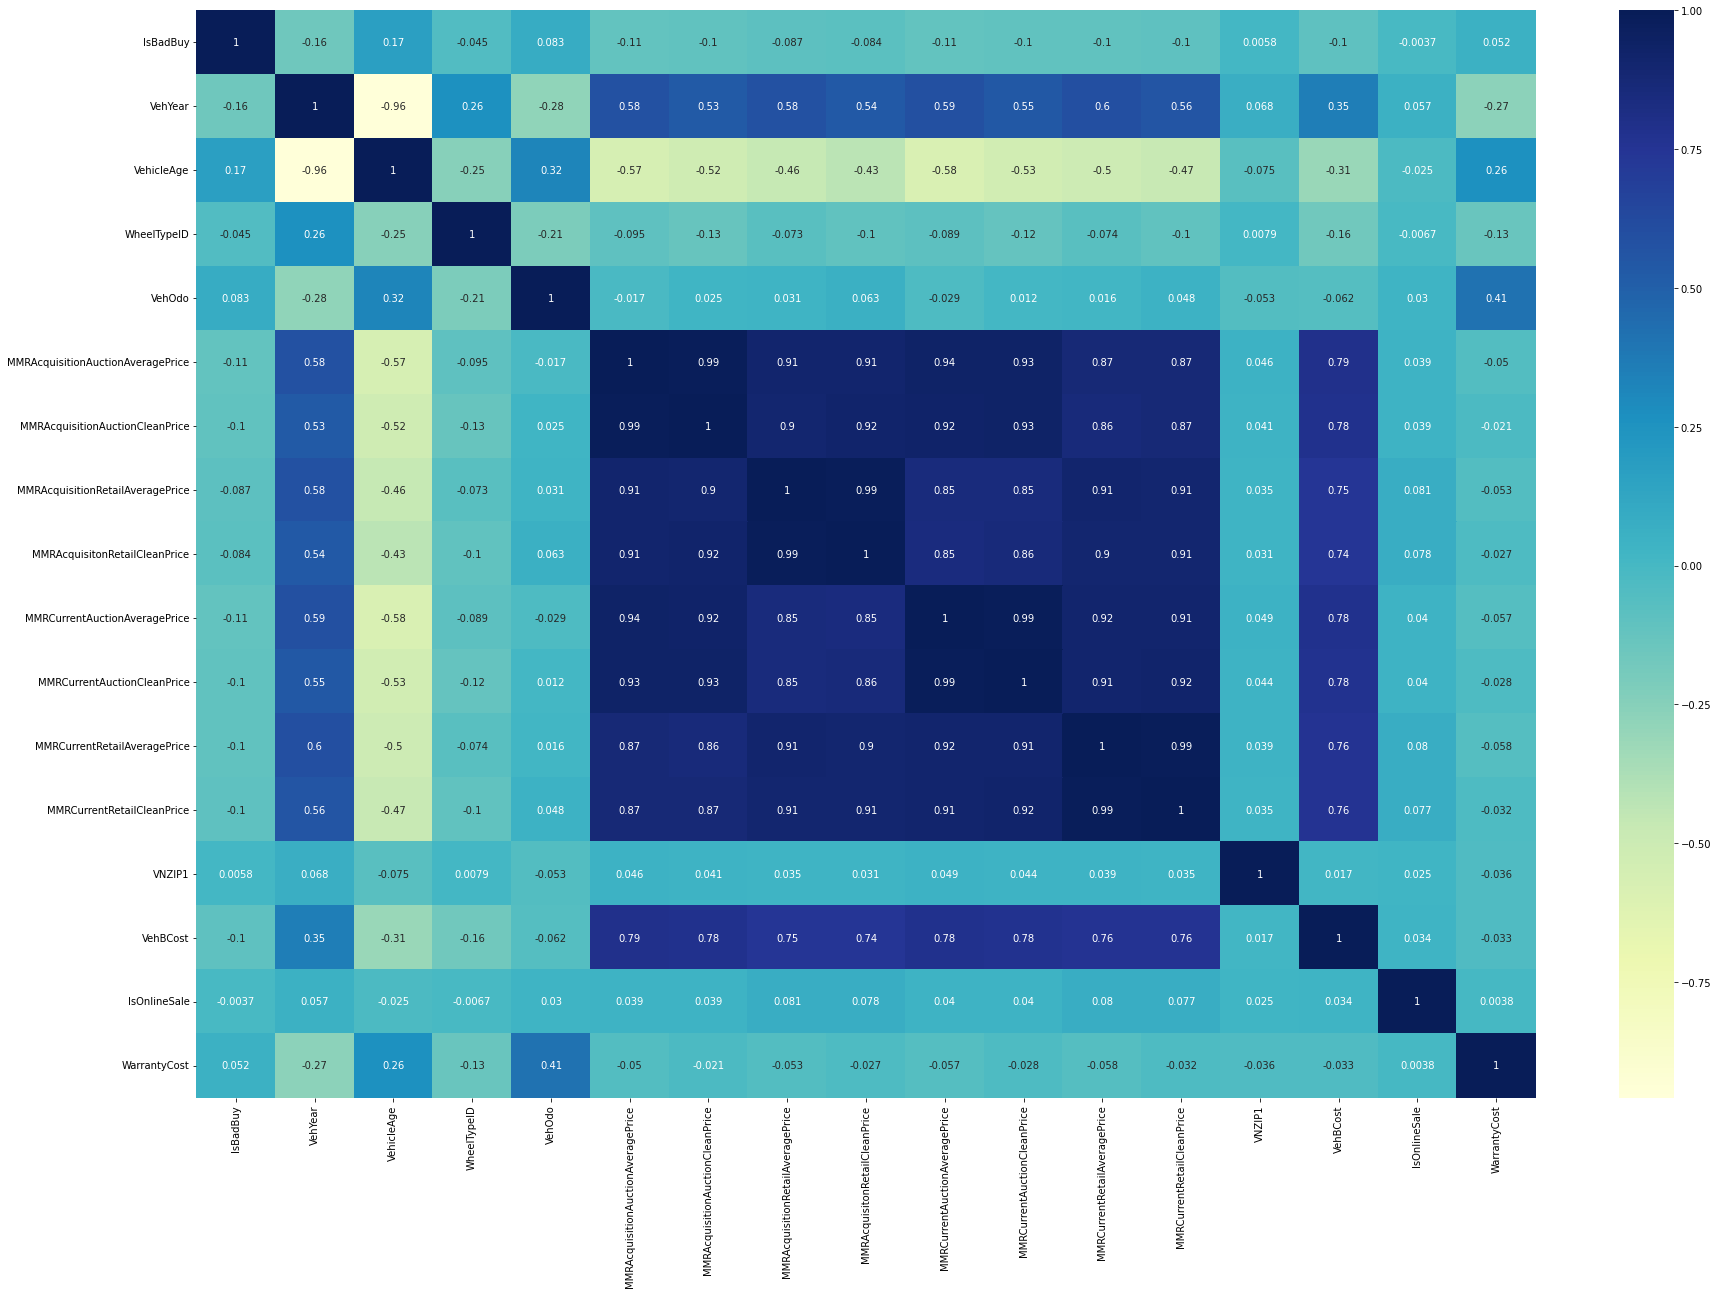

In [22]:
fig, ax = plt.subplots(figsize=(30, 20))
dataplot = sns.heatmap(dgk_df[num_features].corr(), cmap="YlGnBu", annot=True)

Obviously now, the price columns are highly correlated. Good to pick one of them for modeling purpose

In [23]:
dgk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              72983 non-null  int64         
 1   IsBadBuy                           72983 non-null  int64         
 2   PurchDate                          72983 non-null  datetime64[ns]
 3   Auction                            72983 non-null  object        
 4   VehYear                            72983 non-null  int64         
 5   VehicleAge                         72983 non-null  int64         
 6   Make                               72983 non-null  object        
 7   Model                              72983 non-null  object        
 8   Trim                               70623 non-null  object        
 9   SubModel                           72975 non-null  object        
 10  Color                             

now we include the day instead of the purchase date

In [24]:
cat_features = dgk_df.select_dtypes(include =['object']).columns
print(cat_features)
dgk_df[cat_features].describe()

Index(['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT',
       'AUCGUART', 'VNST', 'dow'],
      dtype='object')


,Auction,Make,Model,Trim,SubModel,Color,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,VNST,dow
count,72983,72983,72983,70623,72975,72975,72974,69809,72978,72978,72978,3419,3419,72983,72983
unique,3,33,1063,134,863,16,3,3,4,12,4,2,2,37,7
top,MANHEIM,CHEVROLET,PT CRUISER,Bas,4D SEDAN,SILVER,AUTO,Alloy,AMERICAN,MEDIUM,GM,NO,GREEN,TX,Wednesday
freq,41043,17248,2329,13950,15236,14875,70398,36050,61028,30785,25314,3357,3340,13596,24029


# Select features
remove the following:
1.   WheelTypeID: redundant
2.   RefID, BYRNO: just IDs
3.   MMRCurrentAuctionCleanPrice: high correlated with MMRCurrentAuctionAveragePrice
4.   MMRCurrentRetailCleanPrice: high correlated with MMRCurrentAuctionAveragePrice
5.   MMRAcquisitionAuctionCleanPrice: high correlated with MMRCurrentAuctionAveragePrice
6. MMRAcquisitonRetailCleanPrice MMRAcquisitonRetailCleanPrice MMRAcquisitionRetailAveragePrice MMRCurrentAuctionAveragePrice MMRCurrentRetailAveragePrice: all high correlated with MMRCurrentAuctionAveragePrice
7. VehYear: high correlated with 'VehicleAge'
8. VNZIP1: too many options
9. PurchDate: replaced with day of the week
10. Make: too many options
11. Model: too many options
12. SubModel: too many options
13. Trim: too many options
14. VNST: too many options
15. Color: too many options



In [25]:
col_2_drop_ = "RefId BYRNO WheelTypeID MMRCurrentAuctionCleanPrice MMRCurrentRetailCleanPrice MMRAcquisitionAuctionCleanPrice \
MMRAcquisitonRetailCleanPrice MMRAcquisitionRetailAveragePrice MMRCurrentAuctionAveragePrice MMRCurrentRetailAveragePrice \
VehYear VNZIP1 PurchDate Make Model SubModel Trim VNST Color"
col_2_drop = col_2_drop_.split()
col_2_drop
#test_df

['RefId',
 'BYRNO',
 'WheelTypeID',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailCleanPrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentRetailAveragePrice',
 'VehYear',
 'VNZIP1',
 'PurchDate',
 'Make',
 'Model',
 'SubModel',
 'Trim',
 'VNST',
 'Color']

In [26]:
dgk_df.drop(col_2_drop, axis=1, inplace=True)
dgk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           72983 non-null  int64  
 1   Auction                            72983 non-null  object 
 2   VehicleAge                         72983 non-null  int64  
 3   Transmission                       72974 non-null  object 
 4   WheelType                          69809 non-null  object 
 5   VehOdo                             72983 non-null  int64  
 6   Nationality                        72978 non-null  object 
 7   Size                               72978 non-null  object 
 8   TopThreeAmericanName               72978 non-null  object 
 9   MMRAcquisitionAuctionAveragePrice  72965 non-null  float64
 10  PRIMEUNIT                          3419 non-null   object 
 11  AUCGUART                           3419 non-null   obj

In [27]:
cat_features = dgk_df.select_dtypes(include =['object']).columns
print(cat_features)
dgk_df[cat_features].describe()

Index(['Auction', 'Transmission', 'WheelType', 'Nationality', 'Size',
       'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'dow'],
      dtype='object')


,Auction,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,dow
count,72983,72974,69809,72978,72978,72978,3419,3419,72983
unique,3,3,3,4,12,4,2,2,7
top,MANHEIM,AUTO,Alloy,AMERICAN,MEDIUM,GM,NO,GREEN,Wednesday
freq,41043,70398,36050,61028,30785,25314,3357,3340,24029


In [28]:
dgk_df

,IsBadBuy,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost,dow
0,0,ADESA,3,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,NaN,NaN,7100.0,0,1113,Monday
1,0,ADESA,5,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,NaN,NaN,7600.0,0,1053,Monday
2,0,ADESA,4,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,NaN,NaN,4900.0,0,1389,Monday
3,0,ADESA,5,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,NaN,NaN,4100.0,0,630,Monday
4,0,ADESA,4,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,NaN,NaN,4000.0,0,1020,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,ADESA,8,AUTO,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,NaN,NaN,4200.0,0,993,Wednesday
72979,0,ADESA,2,AUTO,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,NaN,NaN,6200.0,0,1038,Wednesday
72980,0,ADESA,4,AUTO,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,NaN,NaN,8200.0,0,1893,Wednesday
72981,0,ADESA,3,AUTO,Alloy,79554,AMERICAN,LARGE,GM,6420.0,NaN,NaN,7000.0,0,1974,Wednesday


In [29]:
dgk_df.describe()

,IsBadBuy,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72965.000000,72983.000000,72983.000000,72983.000000
mean,0.122988,4.176644,71499.995917,6128.909217,6730.934326,0.025280,1276.580985
std,0.328425,1.712210,14578.913128,2461.992768,1767.846435,0.156975,598.846788
min,0.000000,0.000000,4825.000000,0.000000,1.000000,0.000000,462.000000
25%,0.000000,3.000000,61837.000000,4273.000000,5435.000000,0.000000,837.000000
50%,0.000000,4.000000,73361.000000,6097.000000,6700.000000,0.000000,1155.000000
75%,0.000000,5.000000,82436.000000,7765.000000,7900.000000,0.000000,1623.000000
max,1.000000,9.000000,115717.000000,35722.000000,45469.000000,1.000000,7498.000000


In [30]:
y_data = dgk_df['IsBadBuy']
X_data = dgk_df.drop('IsBadBuy', axis=1, inplace=True)


#check missing values

In [31]:
dgk_df.isnull().sum()

Auction                                  0
VehicleAge                               0
Transmission                             9
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
PRIMEUNIT                            69564
AUCGUART                             69564
VehBCost                                 0
IsOnlineSale                             0
WarrantyCost                             0
dow                                      0
dtype: int64

Deal with missing values separately with numerical and categorical columns

In [32]:
num_features = dgk_df.select_dtypes(include =['float64', 'int64']).columns.tolist()
print(num_features)
cat_features = dgk_df.select_dtypes(include =['object']).columns.tolist()
print(cat_features)

['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']
['Auction', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'dow']


In [33]:
# for numerical, replace missing values with averaged one
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean');
imputer.fit(dgk_df[num_features]);
dgk_df[num_features]=imputer.transform(dgk_df[num_features]);



In [34]:
dgk_df[num_features].isnull().sum() 

VehicleAge                           0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [35]:
for f in cat_features:
  dgk_df.fillna('Unknown', inplace=True)
dgk_df[cat_features].isnull().sum()  # look alright now

Auction                 0
Transmission            0
WheelType               0
Nationality             0
Size                    0
TopThreeAmericanName    0
PRIMEUNIT               0
AUCGUART                0
dow                     0
dtype: int64

Scale the numerical features and encode the cat.features

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dgk_df[num_features]);
dgk_df[num_features]=scaler.transform(dgk_df[num_features])
dgk_df[num_features].describe()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.464072,0.601261,0.171572,0.148015,0.025280,0.115773
std,0.190246,0.131469,0.068912,0.038881,0.156975,0.085112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.514122,0.119618,0.119513,0.000000,0.053297
50%,0.444444,0.618043,0.170707,0.147334,0.000000,0.098493
75%,0.555556,0.699879,0.217373,0.173727,0.000000,0.165009
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(dgk_df[cat_features])
encoded_cols=list(encoder.get_feature_names(cat_features))
dgk_df[encoded_cols]=encoder.transform(dgk_df[cat_features]);
#test_df[encoded_cols]=encoder.transform(test_df[cat_features]);
dgk_df[encoded_cols].describe()
dgk_df.drop(cat_features, axis=1, inplace=True)

Note: day of week Could be simplified as weekday and weekend 

In [ ]:
dgk_df.info()

# Build Models

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dgk_df, y_data, test_size=0.15, random_state=0)

In [39]:
X_train.info

<bound method DataFrame.info of        VehicleAge    VehOdo  MMRAcquisitionAuctionAveragePrice  VehBCost  \
65630    0.888889  0.575641                           0.063154  0.085973   
53349    0.111111  0.359305                           0.206231  0.162730   
54575    0.333333  0.746348                           0.223588  0.153932   
52476    0.222222  0.416279                           0.291725  0.206497   
37047    0.333333  0.720512                           0.343626  0.204407   
...           ...       ...                                ...       ...   
21243    0.555556  0.341864                           0.087033  0.117093   
45891    0.555556  0.737736                           0.187000  0.179775   
42613    0.555556  0.670066                           0.094424  0.120282   
43567    0.666667  0.808679                           0.080623  0.092351   
68268    0.333333  0.530110                           0.170567  0.136118   

       IsOnlineSale  WarrantyCost  Auction_ADESA  Aucti

In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
classifier = LogisticRegression(max_iter =400) # default 100 gives warning
model = classifier.fit(X_train, y_train)
acc_test_log = round(classifier.score(X_test, y_test) * 100, 2)
roc_test_log = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),3)
print(f'logistic regression test accurary:{acc_test_log}% ')
print('logistic regression test ROC: ',roc_test_log)
filename = 'logistic_regression_model.sav'
pickle.dump(model, open(filename, 'wb'))

logistic regression test accurary:89.52% 
logistic regression test ROC:  0.758


In [42]:
# XGBoost
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(n_estimators=500,learning_rate=0.02) #hyper parameters could be adjusted
model = xgb.fit(X_train, y_train)
acc_train_xgb = round(xgb.score(X_train, y_train) * 100, 2)
acc_test_xgb = round(xgb.score(X_test, y_test) * 100, 2)
roc_test_xgb = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),3)
print(f'xgb train accurary: {acc_train_xgb}%')
print(f'xgb test accurary: {acc_test_xgb}%')
print(f'xgb test ROC: {roc_test_xgb}')
filename = 'xgb_model.sav'
pickle.dump(model, open(filename, 'wb'))

xgb train accurary: 89.97%
xgb test accurary: 90.02%
xgb test ROC: 0.768


In [43]:
#Alternative Approach: Deep Learning
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(53,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	  keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=1) # tried epochs 50, but 10 is good enough (nearly converged)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss:'+ str(test_loss) )
print('test_acc: '+ str(test_acc) )
filename = 'nn_model.sav'
pickle.dump(model, open(filename, 'wb'))

Epoch 1/10
62035/62035 [==============================] - 113s 2ms/step - loss: 0.3158 - accuracy: 0.8973
Epoch 2/10
62035/62035 [==============================] - 110s 2ms/step - loss: 0.3106 - accuracy: 0.8985
Epoch 3/10
62035/62035 [==============================] - 113s 2ms/step - loss: 0.3096 - accuracy: 0.8987
Epoch 4/10
62035/62035 [==============================] - 111s 2ms/step - loss: 0.3091 - accuracy: 0.8987
Epoch 5/10
62035/62035 [==============================] - 107s 2ms/step - loss: 0.3088 - accuracy: 0.8987
Epoch 6/10
62035/62035 [==============================] - 107s 2ms/step - loss: 0.3081 - accuracy: 0.8988
Epoch 7/10
62035/62035 [==============================] - 109s 2ms/step - loss: 0.3085 - accuracy: 0.8990
Epoch 8/10
62035/62035 [==============================] - 109s 2ms/step - loss: 0.3082 - accuracy: 0.8988
Epoch 9/10
62035/62035 [==============================] - 111s 2ms/step - loss: 0.3080 - accuracy: 0.8988
Epoch 10/10
343/343 [=========================